# Advanced IoT Agriculture Data Analysis
This notebook provides an analysis of the advanced Internet of things agriculture data set.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = '/Users/brianrisk/Dropbox/Programs/devra_kaggle/advanced_iot_agriculture/Advanced_IoT_Dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


## Data Cleaning
Check for missing values and handle them appropriately.

In [3]:
# Check for missing values
data.isnull().sum()

Random                                                     0
 Average  of chlorophyll in the plant (ACHP)               0
 Plant height rate (PHR)                                   0
Average wet weight of the growth vegetative (AWWGV)        0
Average leaf area of the plant (ALAP)                      0
Average number of plant leaves (ANPL)                      0
Average root diameter (ARD)                                0
 Average dry weight of the root (ADWR)                     0
 Percentage of dry matter for vegetative growth (PDMVG)    0
Average root length (ARL)                                  0
Average wet weight of the root (AWWR)                      0
 Average dry weight of vegetative plants (ADWV)            0
Percentage of dry matter for root growth (PDMRG)           0
Class                                                      0
dtype: int64

## Exploratory Data Analysis (EDA)
Generate summary statistics and visualizations to understand the distribution and relationships between variables.

In [4]:
# Summary statistics
data.describe()

,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


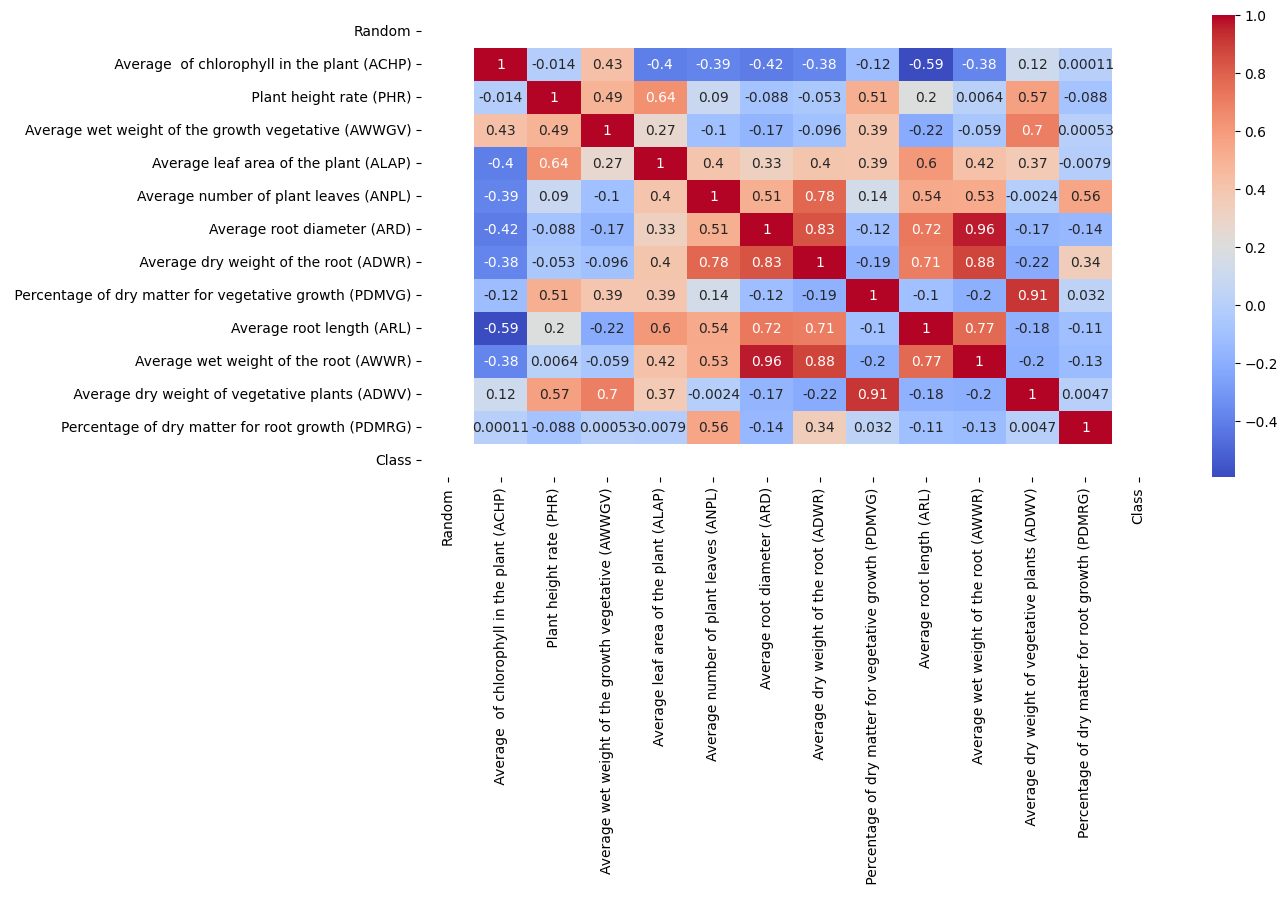

In [5]:
# Visualizations
plt.figure(figsize=(12, 6))
# Convert non-numeric columns to numeric
data_numeric = data.apply(pd.to_numeric, errors='coerce')
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature Engineering
Create new features if necessary to enhance the analysis.

In [6]:
# Example of feature engineering
data['New_Feature'] = data['Average root diameter (ARD)'] * data['Average root length (ARL)']
data.head()

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class,New_Feature
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA,321.251213
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA,321.465427
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA,333.052172
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA,321.238735
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA,294.293714


## Modeling
Apply machine learning models to predict the 'Average root diameter (ARD)' variable.

In [7]:
# Prepare data for modeling
# Convert non-numeric columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')
# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
X = data_imputed[:, :-1]  # All columns except the last one
y = data_imputed[:, 5]   # The 'Average root diameter (ARD)' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Random' 'Class']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [8]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation
Evaluate the performance of the models using appropriate metrics.

In [9]:
# Evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 6.3460250795279e-08
R^2 Score: 0.9999999924183552


## Conclusion
Summarize the findings and provide insights.